# Deep learning to recognice images

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [83]:
np.random.seed(0)

In [84]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [85]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [86]:
assert(X_train.shape[0] == y_train.shape[0]), "Number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "Number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "Dimensions of the images are not 28X28"
assert(X_test.shape[1:] == (28,28)), "Dimensions of the images are not 28X28"

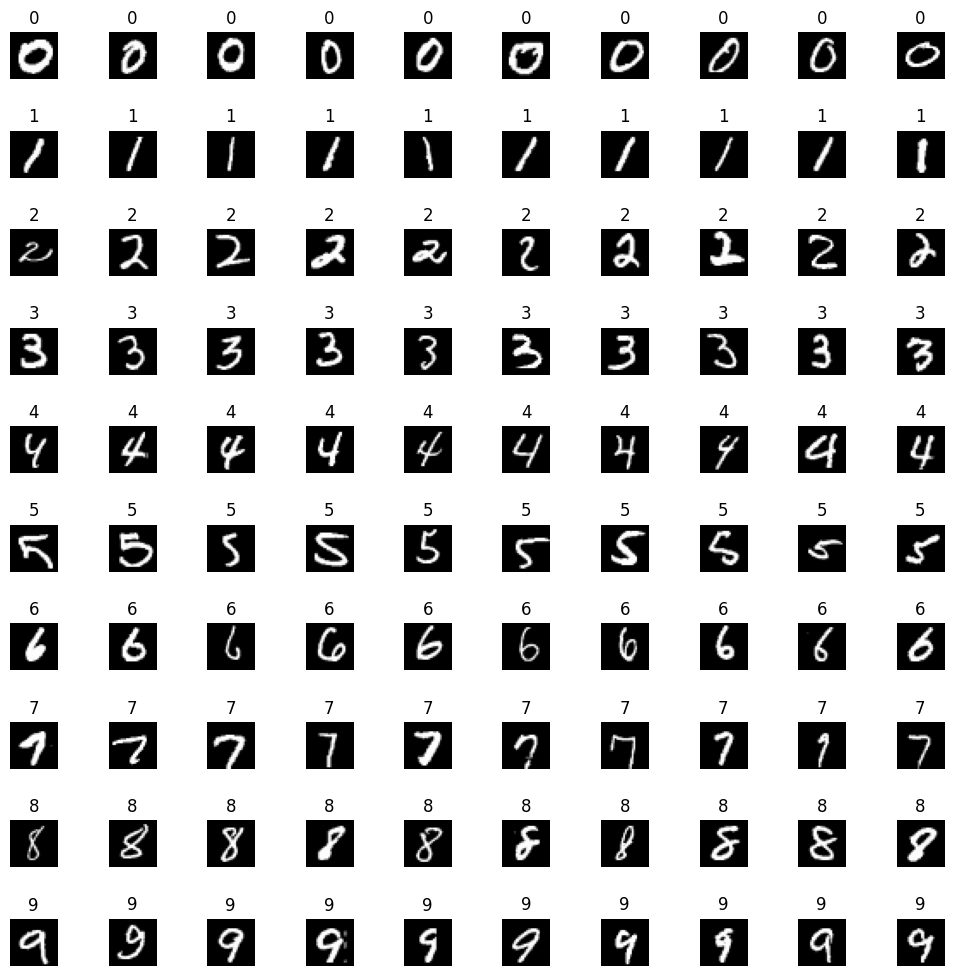

In [87]:
num_of_samples = []
cols=10
num_classes=10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10,10))
fig.tight_layout()
for index_i in range(cols):
    for index_j in range(num_classes):
        x_selected = X_train[y_train==index_j]
        axs[index_j][index_i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
        axs[index_j][index_i].axis("off")
        if index_i>=0 and index_i <=9:
            axs[index_j][index_i].set_title(str(index_j))
            if(index_i<10):
                num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

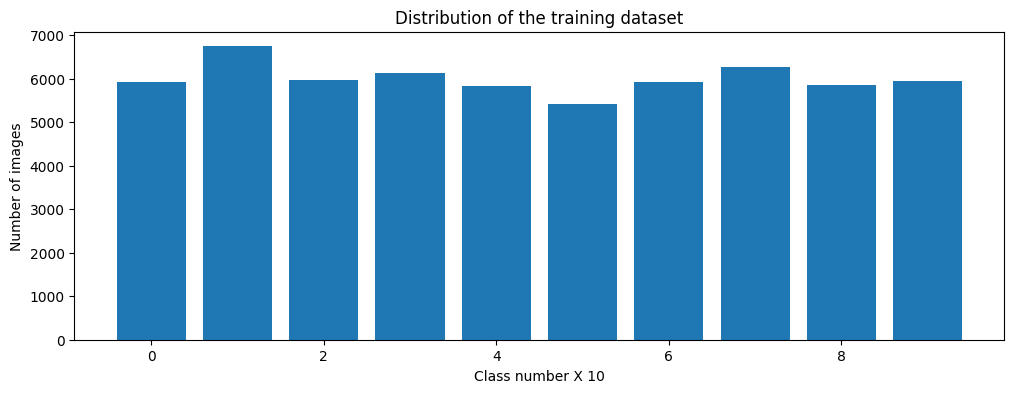

In [88]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples[:10])
plt.title("Distribution of the training dataset")
plt.xlabel("Class number X 10")
plt.ylabel("Number of images")

In [89]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [90]:
X_train = X_train/255
X_test = X_test/255

In [91]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [92]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.03), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [93]:
model = create_model()
print(model.summary())

/home/omargudino/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,180 (31.95 KB)

 Trainable params: 8,180 (31.95 KB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=200, verbose=1, shuffle=1)

Epoch 1/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6993 - loss: 0.8660 - val_accuracy: 0.8987 - val_loss: 0.3433
Epoch 2/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8965 - loss: 0.3553 - val_accuracy: 0.9160 - val_loss: 0.2839
Epoch 3/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3254 - val_accuracy: 0.9108 - val_loss: 0.3002
Epoch 4/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.2966 - val_accuracy: 0.9342 - val_loss: 0.2369
Epoch 5/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.2856 - val_accuracy: 0.9292 - val_loss: 0.2540
Epoch 6/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.2882 - val_accuracy: 0.9317 - val_loss: 0.2433
Epoch 7/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.2876 - val_accuracy: 0.9275 - val_loss: 0.2461
Epoch 8/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9210 - loss: 0.2764 - val_accuracy: 0.

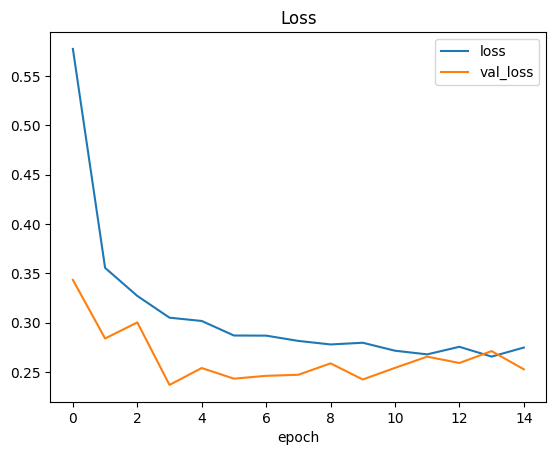

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

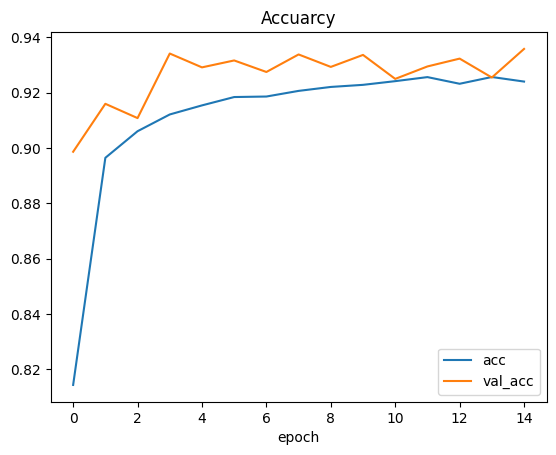

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuarcy')
plt.xlabel('epoch')
plt.show()

In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Tes score: ', score[0])
print('Test accuracy', score[1])

Tes score:  0.26935678720474243
Test accuracy 0.9294000267982483


<Response [200]>


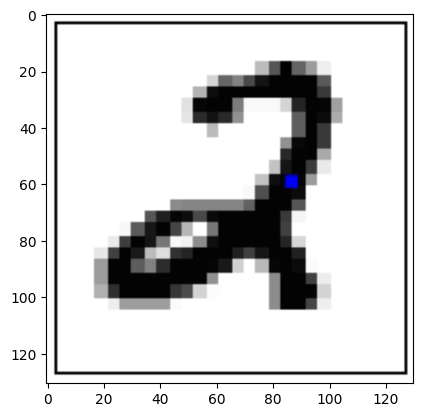

In [98]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

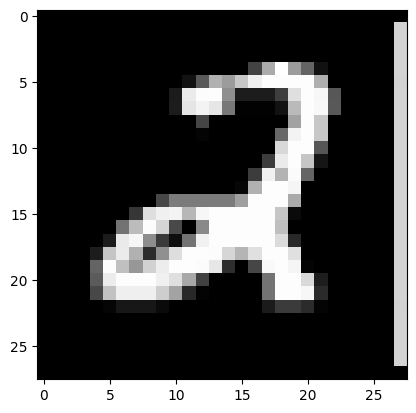

In [99]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
plt.show()


In [100]:
image = image/255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.82352941 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.82352941
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [101]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: [2]
